In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

745

In [6]:
# Import requests dependency to perform API requests and do a version check
import requests
requests.__version__
# Import API key for requests
from config import weather_key
# Build the base url
# url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&lat={lat}&lon={lon}&appid=" + weather_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                         "Current Description": city_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | ahipara
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | jahrom
City not found. Skipping...
Processing Record 5 of Set 1 | oil city
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | atar
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | mnogovershinnyy
Processing Record 12 of Set 1 | weligama
Processing Record 13 of Set 1 | thunder bay
Processing Record 14 of Set 1 | srednekolymsk
Processing Record 15 of Set 1 | pecanha
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | la sarre
Processing Record 19 of Set 1 | bellavista
Processing Record 20 of Set 1 | tanout
Processing Record 21 of Set 1 | chapais
Processing Record 22 of Set 1 | port li

Processing Record 35 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 4 | waingapu
Processing Record 37 of Set 4 | tadepallegudem
Processing Record 38 of Set 4 | jiangyou
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | pantai remis
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | marica
Processing Record 43 of Set 4 | lima
Processing Record 44 of Set 4 | satitoa
City not found. Skipping...
Processing Record 45 of Set 4 | abu zabad
Processing Record 46 of Set 4 | pincher creek
Processing Record 47 of Set 4 | guarapari
Processing Record 48 of Set 4 | banjar
Processing Record 49 of Set 4 | puerto ayora
Processing Record 50 of Set 4 | nikolskoye
Processing Record 1 of Set 5 | abu samrah
Processing Record 2 of Set 5 | sinnamary
Processing Record 3 of Set 5 | atuona
Processing Record 4 of Set 5 | borzoy
Processing Record 5 of Set 5 | chumikan
Processing Record 6 of Set 5 | vanderhoof
P

Processing Record 25 of Set 8 | deputatskiy
Processing Record 26 of Set 8 | kaupanger
Processing Record 27 of Set 8 | sorvag
City not found. Skipping...
Processing Record 28 of Set 8 | guatire
Processing Record 29 of Set 8 | mossendjo
Processing Record 30 of Set 8 | sainte-savine
Processing Record 31 of Set 8 | manggar
Processing Record 32 of Set 8 | bubaque
Processing Record 33 of Set 8 | warrnambool
Processing Record 34 of Set 8 | gazanjyk
Processing Record 35 of Set 8 | harrisonville
Processing Record 36 of Set 8 | chuy
Processing Record 37 of Set 8 | severo-kurilsk
Processing Record 38 of Set 8 | ranong
Processing Record 39 of Set 8 | swan hill
Processing Record 40 of Set 8 | havre
Processing Record 41 of Set 8 | kodino
Processing Record 42 of Set 8 | vostok
Processing Record 43 of Set 8 | bonthe
Processing Record 44 of Set 8 | marfino
Processing Record 45 of Set 8 | grand baie
Processing Record 46 of Set 8 | tagusao
Processing Record 47 of Set 8 | chopovychi
Processing Record 48 o

City not found. Skipping...
Processing Record 13 of Set 12 | mikuni
Processing Record 14 of Set 12 | komsomolskiy
Processing Record 15 of Set 12 | bairiki
Processing Record 16 of Set 12 | goderich
Processing Record 17 of Set 12 | south valley
Processing Record 18 of Set 12 | tautira
Processing Record 19 of Set 12 | kamphaeng phet
Processing Record 20 of Set 12 | pittsburg
Processing Record 21 of Set 12 | zhucheng
Processing Record 22 of Set 12 | umm lajj
Processing Record 23 of Set 12 | hay river
Processing Record 24 of Set 12 | odweyne
Processing Record 25 of Set 12 | herat
Processing Record 26 of Set 12 | buchanan
Processing Record 27 of Set 12 | ust-kut
Processing Record 28 of Set 12 | kimbe
Processing Record 29 of Set 12 | kuusamo
Processing Record 30 of Set 12 | carquefou
Processing Record 31 of Set 12 | pringsewu
Processing Record 32 of Set 12 | huarmey
Processing Record 33 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 34 of Set 12 | jiaojiang
Processing 

In [8]:
len(city_data)

678

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [10]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-07-25 03:01:31,22.8909,-109.9124,84.61,78,25,4.00
1,Ahipara,NZ,2022-07-25 02:59:49,-35.1667,173.1667,63.16,95,97,19.08
2,Longyearbyen,SJ,2022-07-25 03:01:32,78.2186,15.6401,46.24,93,75,6.91
3,Oil City,US,2022-07-25 03:00:30,41.4339,-79.7064,76.59,96,75,13.80
4,Talnakh,RU,2022-07-25 03:01:32,69.4865,88.3972,58.21,75,100,31.68
5,Kapaa,US,2022-07-25 03:01:33,22.0752,-159.3190,84.18,70,9,5.01
6,Atar,MR,2022-07-25 03:01:34,20.5169,-13.0499,88.97,44,3,7.65
7,Mar Del Plata,AR,2022-07-25 03:00:33,-38.0023,-57.5575,51.10,94,85,7.00
8,Busselton,AU,2022-07-25 03:01:34,-33.6500,115.3333,60.84,71,75,19.13
9,Mnogovershinnyy,RU,2022-07-25 03:01:35,53.9353,139.9242,73.81,62,22,5.99


In [11]:
# Create the output file (CSV).
output_data_file = "WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

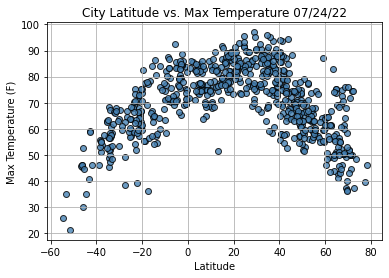

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

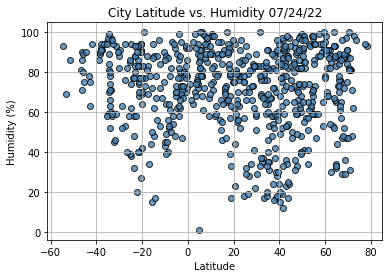

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("Weather_Database/Fig2.png")
# Show plot.
plt.show()

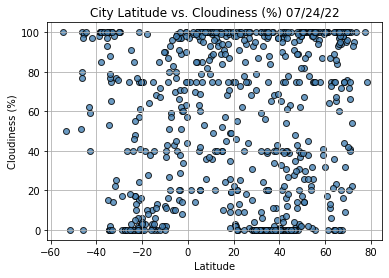

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("Weather_Database/Fig3.png")
# Show plot.
plt.show()

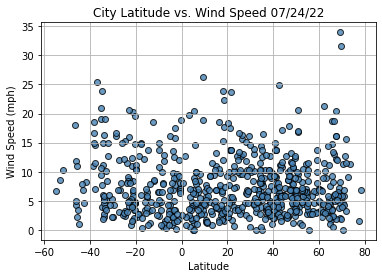

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("Weather_Database/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, edgecolor="black",
            linewidths=1, c="darkcyan", facecolor="white")
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value for this plot is {round(r_value,3)}.")

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

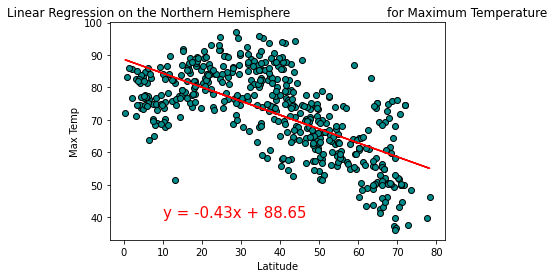

The r-value for this plot is -0.657.


In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

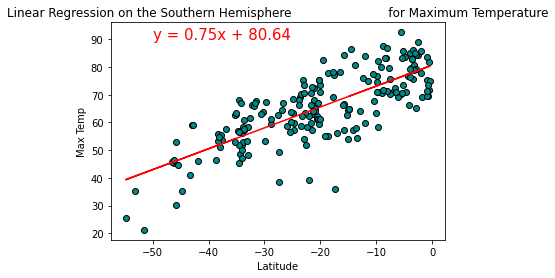

The r-value for this plot is 0.778.


In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

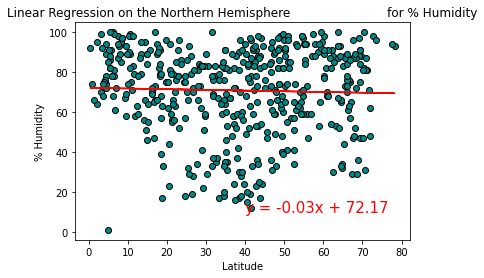

The r-value for this plot is -0.032.


In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

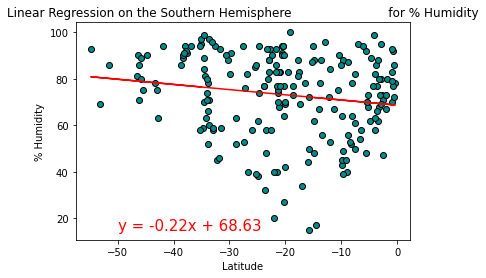

The r-value for this plot is -0.164.


In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

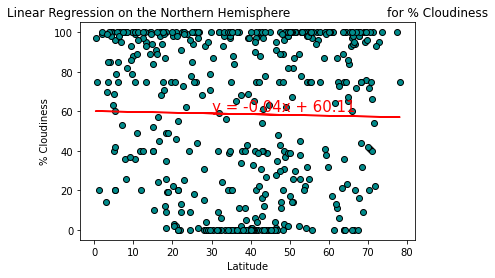

The r-value for this plot is -0.02.


In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,60))

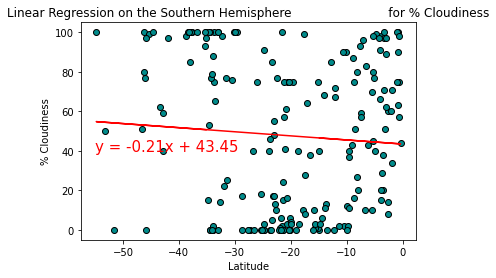

The r-value for this plot is -0.072.


In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,40))

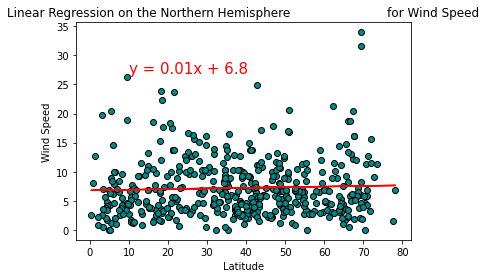

The r-value for this plot is 0.043.


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,27))

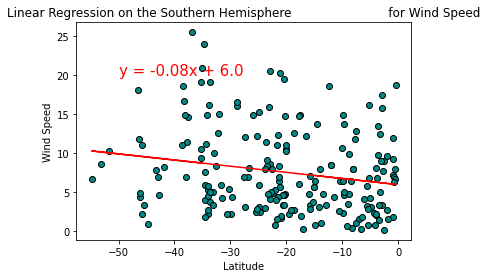

The r-value for this plot is -0.195.


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))